In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [3]:
from IPython.display import Image
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

## Loading dataset

In [1]:
import pandas as pd
## reading in files
mon = pd.read_csv("cic\Monday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
tues = pd.read_csv("cic\Tuesday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
wed = pd.read_csv("cic\Wednesday-workingHours.pcap_ISCX.csv", encoding="utf-8")
thur_web = pd.read_csv("cic\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", encoding="ISO-8859-1") 
thur_inf = pd.read_csv("cic\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", encoding="utf-8")
frid_ddos = pd.read_csv("cic\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", encoding="utf-8")
frid_port = pd.read_csv("cic\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", encoding="utf-8")
frid_morn = pd.read_csv("cic\Friday-WorkingHours-Morning.pcap_ISCX.csv", encoding="utf-8")

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_892\3137251049.py:6: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  thur_web = pd.read_csv("cic\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", encoding="ISO-8859-1")


In [2]:
print("mon DataFrame Shape:", mon.shape)
print("tues DataFrame Shape:", tues.shape)
print("wed DataFrame Shape:", wed.shape)
print("thur_web DataFrame Shape:", thur_web.shape)
print("thur_inf DataFrame Shape:", thur_inf.shape)
print("frid_ddos DataFrame Shape:", frid_ddos.shape)
print("frid_port DataFrame Shape:", frid_port.shape)
print("frid_morn DataFrame Shape:", frid_morn.shape)

mon DataFrame Shape: (529918, 85)
tues DataFrame Shape: (445909, 85)
wed DataFrame Shape: (692703, 85)
thur_web DataFrame Shape: (458968, 85)
thur_inf DataFrame Shape: (288602, 85)
frid_ddos DataFrame Shape: (225745, 85)
frid_port DataFrame Shape: (286467, 85)
frid_morn DataFrame Shape: (191033, 85)


In [2]:
mon.keys()

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
mon.describe()

In [ ]:
### all labels are of numerical type, despite Label column
mon.info()  # same format applies to other files

In [3]:
print('Label distribution monday set:')
print(mon[' Label'].value_counts())
print('=================================')

print('Label distribution tuesday set:')
print(tues[' Label'].value_counts())
print('=================================')

print('Label distribution wednesday set:')
print(wed[' Label'].value_counts())
print('=================================')

print('Label distribution thursday web attacks set:')
print(thur_web[' Label'].value_counts())
print('=================================')

print('Label distribution thursday Infilteration set:')
print(thur_inf[' Label'].value_counts())
print('=================================')

print('Label distribution friday dos set:')
print(frid_ddos[' Label'].value_counts())
print('=================================')

print('Label distribution friday port scan set:')
print(frid_port[' Label'].value_counts())
print('=================================')

print('Label distribution friday pcap set:')
print(frid_morn[' Label'].value_counts())
print('=================================')


Label distribution monday set:
BENIGN    529918
Name:  Label, dtype: int64
Label distribution tuesday set:
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name:  Label, dtype: int64
Label distribution wednesday set:
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64
Label distribution thursday web attacks set:
BENIGN                        168186
Web Attack  Brute Force        1507
Web Attack  XSS                 652
Web Attack  Sql Injection        21
Name:  Label, dtype: int64
Label distribution thursday Infilteration set:
BENIGN          288566
Infiltration        36
Name:  Label, dtype: int64
Label distribution friday dos set:
DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64
Label distribution friday port scan set:
PortScan    158930
BENIGN      127537
Name:  Label, dtype: int64
Label distribution friday pcap set:

In [4]:
# searching for NA values - empty "" are not considered NA - but that is of no concern in this dataset 
pd.options.mode.use_inf_as_na = True ## so that inf is also treated as NA value
print("mon NA values")
print(mon.loc[:, mon.isnull().any()].isnull().sum())
print("=====================")
print("tues NA values")
print(tues.loc[:, tues.isnull().any()].isnull().sum())
print("=====================")
print("wed NA values")
print(wed.loc[:, wed.isnull().any()].isnull().sum())
print("=====================")
print("thur NA values")
print(thur_web.loc[:, thur_web.isnull().any()].isnull().sum())
print("=====================")
print(thur_inf.loc[:, thur_inf.isnull().any()].isnull().sum())
print("=====================")
print("Friday NA values")
print(frid_ddos.loc[:, frid_ddos.isnull().any()].isnull().sum())
print("=====================")
print(frid_port.loc[:, frid_port.isnull().any()].isnull().sum())
print("=====================")
print(frid_morn.loc[:, frid_morn.isnull().any()].isnull().sum())

mon NA values


Flow Bytes/s       437
 Flow Packets/s    437
dtype: int64
tues NA values
Flow Bytes/s       264
 Flow Packets/s    264
dtype: int64
wed NA values
Flow Bytes/s       1297
 Flow Packets/s    1297
dtype: int64
thur NA values
Flow ID              288602
 Source IP           288602
 Source Port         288602
 Destination IP      288602
 Destination Port    288602
                      ...  
Idle Mean            288602
 Idle Std            288602
 Idle Max            288602
 Idle Min            288602
 Label               288602
Length: 85, dtype: int64
Flow Bytes/s       207
 Flow Packets/s    207
dtype: int64
Friday NA values
Flow Bytes/s       34
 Flow Packets/s    34
dtype: int64
Flow Bytes/s       371
 Flow Packets/s    371
dtype: int64
Flow Bytes/s       122
 Flow Packets/s    122
dtype: int64


In [5]:
### NA values are minority of the dataset. Because they cannot be processed by algorithms, they can be easily discarded 
mon = mon.dropna()
tues = tues.dropna()
wed = wed.dropna()
thur_web = thur_web.dropna()
thur_inf = thur_inf.dropna()
frid_ddos = frid_ddos.dropna()
frid_port = frid_port.dropna()
frid_morn = frid_morn.dropna()

In [5]:
print('Dimensions of Wednesday-workingHours.pcap_ISCX: set',frid_morn.shape)

Dimensions of Wednesday-workingHours.pcap_ISCX: set (190911, 85)


In [6]:
## join all data into one DataFrame
all_data = pd.concat([mon, tues, wed, thur_web, thur_inf, frid_ddos, frid_port, frid_morn], ignore_index=True)

In [48]:
print(all_data[' Label'].value_counts())

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64


In [9]:
# 2 class (binaire)
all_data[' Label'] = all_data[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [10]:
print(all_data[' Label'].value_counts())

0    2271320
1     556556
Name:  Label, dtype: int64


In [46]:
# 2 class (binaire)
# Filter the dataframe to select rows where 'Label' is not equal to 'BENIGN'
attacks_data = all_data[all_data[' Label'] != 'BENIGN']

In [47]:
print(attacks_data[' Label'].value_counts())

DoS Hulk                      230124
PortScan                      158804
DDoS                          128025
DoS GoldenEye                  10293
FTP-Patator                     7935
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1956
Web Attack  Brute Force        1507
Web Attack  XSS                 652
Infiltration                      36
Web Attack  Sql Injection        21
Heartbleed                        11
Name:  Label, dtype: int64


In [50]:
all_data.shape

(2827876, 85)

<Axes: >

c:\Users\dz laptops\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
c:\Users\dz laptops\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


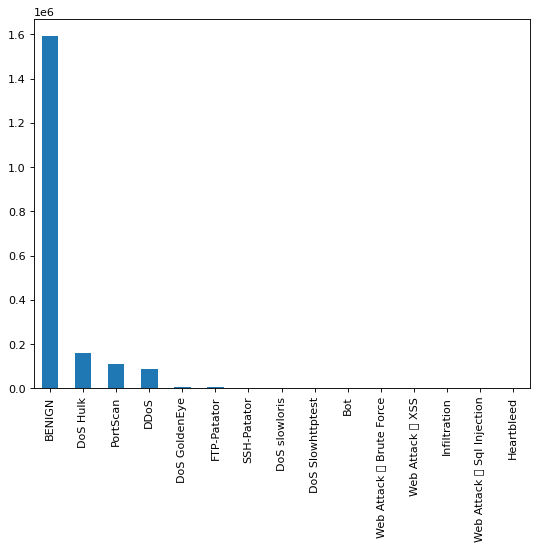

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

train_data[' Label'].value_counts().plot(kind='bar')

## Data pre processing

In [7]:
# explore categorical features
print('alldata set:')
for col_name in all_data.columns:
    if all_data[col_name].dtypes == 'object' :
        unique_cat = len(all_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


alldata set:
Feature 'Flow ID' has 1084637 categories
Feature ' Source IP' has 17002 categories
Feature ' Destination IP' has 19112 categories
Feature ' Timestamp' has 27964 categories
Feature ' Label' has 15 categories


## Insert categorical columns into 2D array

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', ' Label'] 
all_data_categorical_values = all_data[categorical_columns]

all_data_categorical_values.rename(columns={'Flow ID': 'Flow ID',
                                      ' Source IP': 'Source IP',
                                      ' Destination IP' : 'Destination IP',
                                      ' Timestamp': 'Timestamp',
                                      ' Label': 'Label'}, inplace=True, errors='raise')

all_data_categorical_values = all_data_categorical_values[['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']]



C:\Users\dz laptops\AppData\Local\Temp\ipykernel_892\3558772422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_categorical_values.rename(columns={'Flow ID': 'Flow ID',


In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
all_data_categorical_values = all_data_categorical_values.apply(LabelEncoder().fit_transform)

all_data_categorical_values = all_data_categorical_values.add_suffix('_enc')
print(all_data_categorical_values.head())

   Flow ID_enc  Source IP_enc  Destination IP_enc  Timestamp_enc
0       942303          16436                5454          12230
1       942303          16436                5454          12230
2       942303          16436                5454          12230
3       942303          16436                5454          12230
4       442238          16431                5446          12231


In [10]:
all_data_categorical_values.shape

(2827876, 4)

In [11]:
all_data.shape

(2827876, 85)

In [12]:
all_data2 = all_data.join(all_data_categorical_values)


In [15]:
all_data2.shape

(2827876, 85)

In [ ]:
all_data.keys()

In [13]:
all_data2.drop(' Source IP', axis=1, inplace=True) # enc
all_data2.drop(' Destination IP', axis=1, inplace=True)
all_data2.drop(' Timestamp', axis=1, inplace=True)
all_data2.drop('Flow ID', axis=1, inplace=True)

In [14]:
all_data2.shape

(2827876, 85)

In [26]:
all_data2.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID_enc,Source IP_enc,Destination IP_enc,Timestamp_enc
0,80.0,49188.0,6.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0,942303,16436,5454,12230
1,80.0,49188.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0,942303,16436,5454,12230
2,80.0,49188.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0,942303,16436,5454,12230
3,80.0,49188.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0,942303,16436,5454,12230
4,80.0,49486.0,6.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0,442238,16431,5446,12231


In [16]:
## feature selection phase - find cols w/ all zero values ugvvuhhvh

#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = all_data2.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

,Bwd PSH Flags,Bwd URG Flags,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
count,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
### feature selection phase - lets's cut out features that are reduntant - all zero values 
## removing [8] features from previous cell - they are reduntant 

all_data2.drop(columns=all_zeroes_cols, inplace=True)

all_data2.shape # check if resulting DataFrame valid

(2827876, 77)

In [62]:
### just rename Labels that contain non-printable characters 
print("Before...")
print(all_data2.loc[:,' Label'].unique())

all_data2.loc[:,' Label'].replace({"Web Attack � XSS" : "XSS", "Web Attack � Sql Injection": "Sql Injection", "Web Attack � Brute Force": "Brute Force"}, inplace=True)
print("After..")
print(all_data2.loc[:,' Label'].unique())

## remove trailing && leading spaces from all the labels
rename_cols = lambda col_lbl: col_lbl.strip()
all_data2.rename(rename_cols, axis=1, inplace=True, errors="raise")

Before...
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Web Attack \x96 Brute Force'
 'Web Attack \x96 XSS' 'Web Attack \x96 Sql Injection' 'Infiltration'
 'DDoS' 'PortScan' 'Bot']
After..
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Web Attack \x96 Brute Force'
 'Web Attack \x96 XSS' 'Web Attack \x96 Sql Injection' 'Infiltration'
 'DDoS' 'PortScan' 'Bot']


In [17]:
all_data2.shape

(2827876, 77)

In [19]:
print(all_data2[' Label'].value_counts())

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64


In [ ]:
# MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# select numeric columns
#numeric_cols = attacks_data.select_dtypes(include='number').columns
numeric_cols = all_data2.select_dtypes(include=np.number).columns
numeric_cols = [col for col in numeric_cols if col != ' Label']

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the numeric columns
all_data2[numeric_cols] = scaler.fit_transform(all_data2[numeric_cols])


In [25]:
print(all_data2[' Label'].value_counts())

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64


In [7]:
all_data2.head(5)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID_enc,Source IP_enc,Destination IP_enc,Timestamp_enc
0,0.006760,0.143206,0.352941,7.333333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,...,0.0,0.0,0.0,0.0,0.0,BENIGN,0.982841,0.526631,0.287955,0.978350
1,0.815534,0.015717,0.352941,1.833333e-07,0.000000,0.000003,1.550388e-07,9.153974e-09,0.000081,0.000860,...,0.0,0.0,0.0,0.0,0.0,PortScan,0.183476,0.208635,0.287793,0.992931
2,0.943618,0.000809,1.000000,2.045083e-04,0.000005,0.000007,5.581395e-06,4.302368e-07,0.001450,0.015484,...,0.0,0.0,0.0,0.0,0.0,BENIGN,0.754749,0.278349,0.287685,0.952555
3,0.246372,0.000809,1.000000,4.072416e-04,0.000005,0.000007,5.116279e-06,2.288494e-07,0.001330,0.014194,...,0.0,0.0,0.0,0.0,0.0,BENIGN,0.702042,0.278159,0.287685,0.969209
4,0.006760,0.808408,0.352941,1.416667e-07,0.000005,0.000000,2.403101e-06,0.000000e+00,0.001249,0.000000,...,0.0,0.0,0.0,0.0,0.0,BENIGN,0.481739,0.417145,0.287468,0.975204


In [24]:
all_data2.shape

(2827876, 77)

In [15]:
all_data2.keys()

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd URG Flags', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', 'FIN Fla

In [20]:
# iterate over the columns and print out the variance for columns that have a variance greater than 0.01
# Get the variance of each column starting from row 1
variances = all_data2.iloc[1:].apply(pd.to_numeric, errors='coerce').var()

# Filter the variances that are greater than 0.01
filtered_variances = variances[variances > 0.01]

# Print the filtered variances along with their corresponding column names
for col_name, variance in filtered_variances.iteritems():
    print(f"{col_name}: {variance}")

 Source Port: 0.11570067035610095
 Destination Port: 0.07775623154597168
 Protocol: 0.09584915542129958
 Flow Duration: 0.07871534621770045
 Bwd Packet Length Mean: 0.010896242847248308
 Bwd Packet Length Std: 0.010508708535910672
 Flow IAT Max: 0.04158264498573849
Fwd IAT Total: 0.07835177158773345
 Fwd IAT Std: 0.012992352241933156
 Fwd IAT Max: 0.041819913931954236
Bwd IAT Total: 0.0573979950434755
 Bwd IAT Max: 0.020470458581123077
Fwd PSH Flags: 0.04424339843785239
 Packet Length Std: 0.017844423940310432
FIN Flag Count: 0.03403782166749142
 SYN Flag Count: 0.04424339843785239
 PSH Flag Count: 0.20931060574368596
 ACK Flag Count: 0.21589134351953032
 URG Flag Count: 0.08583661766262357
 Avg Bwd Segment Size: 0.01089624284724901
Init_Win_bytes_forward: 0.047879755593706386
 Init_Win_bytes_backward: 0.016642553536164378
Idle Mean: 0.03881088253063906
 Idle Max: 0.04126879515131721
 Idle Min: 0.03794022619165291
Flow ID_enc: 0.07384747983450718
Source IP_enc: 0.015096682479209237
Des

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_6828\3318733232.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, variance in filtered_variances.iteritems():


In [21]:
# Get the column names where the variance is less than or equal to 0.01
low_variance_cols = variances[variances <= 0.01].index.tolist()

# Print the column names where the variance is less than or equal to 0.01
print("Columns with variance <= 0.01:")
print(low_variance_cols)

Columns with variance <= 0.01:
[' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min', ' Fwd IAT Mean', ' Fwd IAT Min', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Variance', ' RST Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active M

In [ ]:
all_data2 = all_data2.drop(['Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'CWE Flag Count',
                                       'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min',
                                          'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Min', 'Flow Bytes/s',
                                           'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std',  'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Min', 
                                           'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Min', 'Fwd Packets/s', 'Bwd Packets/s',
                                             'Min Packet Length', 'Packet Length Variance', 'Fwd URG Flags', 'RST Flag Count',
                                               'Down/Up Ratio', 'Avg Fwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
                                                 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'act_data_pkt_fwd', 'Active Mean', 'Active Std',
                                                   'Active Max', 'Active Min', 'Idle Std', 'ECE Flag Count'], axis=1)



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the DataFrame into feature matrix (X) and target variable (y)
X = all_data2.drop('Label', axis=1)
y = all_data2['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a random forest classifier
rf = RandomForestClassifier()

# Fit the random forest classifier on the training data
rf.fit(X_train, y_train)

# Get feature importances from the trained random forest classifier
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

In [41]:
# Set the maximum number of rows to display in pandas
pd.set_option('display.max_rows', None)

# Set the desired number of top features to print
top_features = importance_df.head(90)
print(top_features)

                        Feature    Importance
73                Source IP_enc  1.317322e-01
72                  Flow ID_enc  9.728582e-02
75                Timestamp_enc  6.532685e-02
15        Bwd Packet Length Std  4.637960e-02
74           Destination IP_enc  4.364816e-02
54         Avg Bwd Segment Size  3.635287e-02
1              Destination Port  3.085152e-02
14       Bwd Packet Length Mean  3.011256e-02
52          Average Packet Size  2.918564e-02
40           Packet Length Mean  2.659110e-02
41            Packet Length Std  2.642755e-02
12        Bwd Packet Length Max  2.515550e-02
13        Bwd Packet Length Min  2.475059e-02
57            Subflow Fwd Bytes  2.406579e-02
39            Max Packet Length  2.216084e-02
42       Packet Length Variance  2.045777e-02
61      Init_Win_bytes_backward  1.845803e-02
6   Total Length of Fwd Packets  1.636858e-02
53         Avg Fwd Segment Size  1.600429e-02
8         Fwd Packet Length Max  1.555465e-02
60       Init_Win_bytes_forward  1

In [42]:
for index, row in importance_df.iterrows():
    feature = row['Feature']
    importance = row['Importance']
    importance = int(importance * 100)  # Convert importance to integer percentage value
    print(f"Feature: {feature}, Importance: {importance}%")

Feature: Source IP_enc, Importance: 13%
Feature: Flow ID_enc, Importance: 9%
Feature: Timestamp_enc, Importance: 6%
Feature: Bwd Packet Length Std, Importance: 4%
Feature: Destination IP_enc, Importance: 4%
Feature: Avg Bwd Segment Size, Importance: 3%
Feature: Destination Port, Importance: 3%
Feature: Bwd Packet Length Mean, Importance: 3%
Feature: Average Packet Size, Importance: 2%
Feature: Packet Length Mean, Importance: 2%
Feature: Packet Length Std, Importance: 2%
Feature: Bwd Packet Length Max, Importance: 2%
Feature: Bwd Packet Length Min, Importance: 2%
Feature: Subflow Fwd Bytes, Importance: 2%
Feature: Max Packet Length, Importance: 2%
Feature: Packet Length Variance, Importance: 2%
Feature: Init_Win_bytes_backward, Importance: 1%
Feature: Total Length of Fwd Packets, Importance: 1%
Feature: Avg Fwd Segment Size, Importance: 1%
Feature: Fwd Packet Length Max, Importance: 1%
Feature: Init_Win_bytes_forward, Importance: 1%
Feature: Total Fwd Packets, Importance: 1%
Feature: Bw

In [72]:
all_data2.keys()

Index(['Unnamed: 0', ' Source Port', ' Destination Port', ' Protocol',
       ' Flow Duration', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Max', 'Fwd IAT Total',
       ' Fwd IAT Std', ' Fwd IAT Max', 'Bwd IAT Total', ' Bwd IAT Max',
       'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length',
       ' Packet Length Mean', ' Packet Length Std', 'FIN Flag Count',
       ' SYN Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' Avg Bwd Segment Size', ' Fwd Header Length.1',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward', 'Idle Mean', ' Idle Max', ' Idle Min',
       ' Label', 'Flow ID_enc', 'Source IP_enc', 'Destination IP_enc',
       'Timestamp_enc'],
      dtype='object')

In [26]:
# Features to be dropped
features_to_drop = ['Flow Bytes/s',
    ' act_data_pkt_fwd',
    ' Fwd IAT Max',
    'Fwd Packets/s',
    ' Flow Duration',
    'Subflow Fwd Packets',
    ' Subflow Bwd Packets',
    ' Total Backward Packets',
    'Fwd IAT Total',
    ' Flow IAT Std',
    ' Idle Max',
    ' Fwd IAT Mean',
    'Idle Mean',
    ' ACK Flag Count',
    ' Subflow Bwd Bytes',
    ' Flow Packets/s',
    ' Min Packet Length',
    ' Idle Min',
    ' Down/Up Ratio',
    ' Total Length of Bwd Packets',
    ' Fwd Packet Length Min',
    ' Fwd IAT Min',
    ' Bwd IAT Mean',
    'Bwd IAT Total',
    ' Bwd IAT Std',
    'Active Mean',
    ' Flow IAT Min',
    ' Bwd IAT Max',
    ' Active Min',
    'FIN Flag Count',
    ' Active Max',
    ' URG Flag Count',
    ' SYN Flag Count',
    ' Bwd IAT Min',
    'Fwd PSH Flags',
    ' Idle Std',
    ' Active Std',
    ' Bwd Header Length',
    ' Protocol',
    ' Fwd Header Length.1',
    ' Fwd Header Length',
    ' CWE Flag Count',
    ' Fwd URG Flags',
    ' RST Flag Count',
    ' min_seg_size_forward',
    ' ECE Flag Count']


# Drop the specified features from the dataset
all_data2 = all_data2.drop(features_to_drop, axis=1)

In [28]:
all_data2.shape

(2827876, 31)

In [27]:
print(all_data2[' Label'].unique())


['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Web Attack \x96 Brute Force'
 'Web Attack \x96 XSS' 'Web Attack \x96 Sql Injection' 'Infiltration'
 'DDoS' 'PortScan' 'Bot']


In [30]:
print(all_data2.loc[:,' Label'].unique())

['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Web Attack \x96 Brute Force'
 'Web Attack \x96 XSS' 'Web Attack \x96 Sql Injection' 'Infiltration'
 'DDoS' 'PortScan' 'Bot']


In [31]:
print(all_data2.loc[:,' Label'].value_counts())

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64


In [32]:
label_newdf=all_data2[' Label']

newlabeldf=label_newdf.replace({'BENIGN': 0, # normal
                            'DoS slowloris': 1, 'DoS Slowhttptest': 1, 'DoS Hulk': 1, 'DoS GoldenEye': 1, # Dos
                            'DDoS': 2,  # DDos
                            'Web Attack \x96 Brute Force': 3, 'Web Attack \x96 XSS': 3, 'Web Attack \x96 Sql Injection': 3, # Web Attack
                            'Bot': 4,   # Botnet
                            #'Infiltration': ,   
                            'PortScan': 5,  # PortScan
                            'Heartbleed': 6, # Heartbleed
                            'FTP-Patator': 7, 'SSH-Patator': 7 # Patator
                            })

all_data2[' Label'] = newlabeldf

In [36]:
print(all_data2.loc[:,' Label'].unique())

[0 7 1 6 3 2 5 4]


In [37]:
print(all_data2.loc[:,' Label'].value_counts())

0    2271320
1     251712
5     158804
2     128025
7      13832
3       2180
4       1956
6         11
Name:  Label, dtype: int64


In [35]:
# Remove rows with 'BENIGN' or 'Infiltration' in the 'Label' column
all_data2 = all_data2[~all_data2[' Label'].isin(['Infiltration'])]

In [38]:
all_data2.shape

(2827840, 31)

In [29]:
# Define attack categories
Normal = [0]
DoS = [1]
DDoS = [2]
Web_Attack = [3]
Botnet = [4]
Scan = [5]
Heartbleed = [6]
Patator = [7]

# create separate dataframes for each attack category
normal_df = all_data[all_data['Label'].isin(Normal)]
dos_df = all_data[all_data['Label'].isin(DoS)]
ddoS_df= all_data[all_data['Label'].isin(DDoS)]
web_attack_df = all_data[all_data['Label'].isin(Web_Attack)]
botnet_df = all_data[all_data['Label'].isin(Botnet)]
scan_df = all_data[all_data['Label'].isin(Scan)]
heartbleed_df = all_data[all_data['Label'].isin(Heartbleed)]
patator_df = all_data[all_data['Label'].isin(Patator)]

# check the first 10 rows of each dataframe
print(normal_df.shape)
print(dos_df.shape)
print(ddoS_df.shape)
print(web_attack_df.shape)
print(botnet_df.shape)
print(scan_df.shape)
print(heartbleed_df.shape)
print(patator_df.shape)

(2271320, 38)
(251712, 38)
(128025, 38)
(2180, 38)
(1956, 38)
(158804, 38)
(11, 38)
(13832, 38)


In [30]:
normal_df.to_csv("attacks\\normal.csv", index=False)
dos_df.to_csv("attacks\\dos.csv", index=False)
ddoS_df.to_csv("attacks\\ddos.csv", index=False)
web_attack_df.to_csv("attacks\\web_attack.csv", index=False)
botnet_df.to_csv("attacks\\botnet.csv", index=False)
scan_df.to_csv("attacks\\scan.csv", index=False)
heartbleed_df.to_csv("attacks\\heartbleed.csv", index=False)
patator_df.to_csv("attacks\\patator.csv", index=False)

In [1]:
import pandas as pd
normal_df = pd.read_csv('attacks/normal.csv')
dos_df = pd.read_csv('attacks/dos.csv')
ddoS_df = pd.read_csv('attacks/ddoS.csv')
web_attack_df = pd.read_csv('attacks/web_attack.csv')
botnet_df = pd.read_csv('attacks/botnet.csv')
scan_df = pd.read_csv('attacks/scan.csv')
heartbleed_df = pd.read_csv('attacks/heartbleed.csv')
patator_df = pd.read_csv('attacks/patator.csv')

In [14]:
print(web_attack_df['Label'].unique())

[3]


In [15]:
cic_df = pd.concat([normal_df, dos_df, ddoS_df, web_attack_df, botnet_df, scan_df, heartbleed_df, patator_df])

# Save the combined dataframe as CSV file
#cic_df.to_csv('cic.csv', index=False)


In [17]:
print(cic_df[' Label'].value_counts())

0    2271320
1     251712
5     158804
2     128025
7      13832
3       2180
4       1956
6         11
Name: Label, dtype: int64


In [143]:
# Group the DataFrame by the 'Label_enc' column
groups = cic_df.groupby(' Label')

# Iterate through the groups and save each group to a separate CSV file
for label, group in groups:
    filename = f'{label}.csv'
    group.to_csv(filename, index=False)
    print(f'Saved {len(group)} rows to {filename}')

Saved 2500 rows to 0.csv
Saved 2500 rows to 1.csv
Saved 2500 rows to 2.csv
Saved 2500 rows to 3.csv
Saved 2500 rows to 4.csv
Saved 2500 rows to 5.csv
Saved 2500 rows to 6.csv
Saved 2500 rows to 7.csv


In [144]:
import pandas as pd

# List of file names
files = ['0.csv', '1.csv', '2.csv', '3.csv', '4.csv', '5.csv','6.csv', '7.csv']
 
# Iterate over each file
for file in files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Extract the 'Label' column
    labels = df[' Label']
    
    # Normalize the labels between 0 and 1 by dividing by 7 and round to 2 decimal places
    normalized_labels = (labels / 7).round(2)
    
    # Update the 'Label' column with the normalized values
    df[' Label'] = normalized_labels
    
    # Save the updated DataFrame to a new CSV file
    new_filename = file
    df.to_csv(new_filename, index=False)
    
    print(f"Normalized saved to {new_filename}")

Normalized saved to 0.csv
Normalized saved to 1.csv
Normalized saved to 2.csv
Normalized saved to 3.csv
Normalized saved to 4.csv
Normalized saved to 5.csv
Normalized saved to 6.csv
Normalized saved to 7.csv


In [140]:
import pandas as pd

cic_df = pd.read_csv('section3.csv')

In [141]:
print(cic_df[' Label'].value_counts())

0    2500
1    2500
2    2500
3    2500
4    2500
5    2500
6    2500
7    2500
Name:  Label, dtype: int64


In [142]:
cic_df.shape

(20000, 31)

In [152]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

"""newlabeldf=label_newdf.replace({'BENIGN': 0, # normal
                            'DoS slowloris': 1, 'DoS Slowhttptest': 1, 'DoS Hulk': 1, 'DoS GoldenEye': 1, # Dos
                            'DDoS': 2,  # DDos
                            'Web Attack \x96 Brute Force': 3, 'Web Attack \x96 XSS': 3, 'Web Attack \x96 Sql Injection': 3, # Web Attack
                            'Bot': 4,   # Botnet
                            #'Infiltration': ,   
                            'PortScan': 5,  # PortScan
                            'Heartbleed': 6, # heartbleed
                            'FTP-Patator': 7, 'SSH-Patator': 7, # Patator
                            })"""

# Load the CSV file into a pandas DataFrame
web_attack_train = pd.read_csv('7.csv')

# Reshape the DataFrame into a 2D matrix
matrix = web_attack_train.values.reshape(web_attack_train.shape)

# Normalize the matrix to the range [0, 1]
normalized_matrix = (matrix - matrix.min()) / (matrix.max() - matrix.min())

# Apply a colormap to convert the matrix to RGB values
cmap = plt.get_cmap('gray')
colored_matrix = cmap(normalized_matrix)

# Remove the extra dimension from the colored matrix
colored_matrix = np.squeeze(colored_matrix)

# Convert the colored matrix into a PIL Image
image = Image.fromarray(np.uint8(colored_matrix*255))

# Save the image
image.save('S3/patator.png')

In [160]:
import numpy as np
from patchify import patchify
from PIL import Image

image = Image.open("S3/web.png")
image_array = np.asarray(image)
# NUM TA3 LES COLS
patches = patchify(image_array, (224, 31, 3), step=224)
print(patches.shape)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j, 0]
        patch = Image.fromarray(patch)
        num = i * patches.shape[1] + j
        patch.save(f"S3patch/patch_web_attack_{num}.png")

(11, 1, 1, 224, 31, 3)


In [161]:
import os
import csv

path = 'S3patch/'
labels = []

for filename in os.listdir(path):
    if 'normal' in filename:
        label = 0
        labels.append(label)
    """if 'attack' in filename:
        label = 1
        labels.append(label)"""
    if 'heartbleed' in filename:
        label = 6
        labels.append(label)
    if 'DDos' in filename:
        label = 2
        labels.append(label)
    if 'dos' in filename:
        label = 1
        labels.append(label)
    if 'web_attack' in filename:
        label = 3
        labels.append(label)
    if 'scan' in filename:
        label = 5
        labels.append(label)
    if 'botnet' in filename:
        label = 4
        labels.append(label)
    if 'patator' in filename:
        label = 7
        labels.append(label)


with open('S3labels/labels_rf.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for label in labels:
        writer.writerow([label])


In [178]:
import numpy as np
from PIL import Image
import os

path = 'S1patch/'
images = []

for filename in os.listdir(path):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        img = Image.open(os.path.join(path, filename))
        images_arr_train = np.array(img)
        images.append(images_arr_train)

images_arr_train = np.array(images)
print(images_arr_train.shape)

(88, 224, 31, 3)


In [179]:
import pandas as pd

labels_train = pd.read_csv("S1labels/labels_rf.csv", header=None)

print('labels 4 shape : ' + str(labels_train.shape))

labels 4 shape : (88, 1)


In [164]:
labels_train.value_counts()

0    11
1    11
2    11
3    11
4    11
5    11
6    11
7    11
dtype: int64

In [82]:
import pandas as pd

all_data2 = pd.read_csv("20kOR.csv", encoding="utf-8")

In [87]:
print(all_data2[' Label'].value_counts())

0    2500
1    2500
2    2500
3    2500
4    2500
5    2500
6    2500
7    2500
Name:  Label, dtype: int64


In [88]:
all_data2.shape

(20000, 31)

In [85]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

X = all_data2.drop(' Label', axis=1)
y = all_data2[' Label']

rus = RandomUnderSampler(sampling_strategy={0: 2500, 1: 2500, 5: 2500, 2: 2500, 7: 2500}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

all_data2 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
all_data2.columns = list(X.columns) + [' Label']

In [86]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import pandas as pd

X = all_data2.drop(' Label', axis=1)
y = all_data2[' Label']

ros = SMOTE(sampling_strategy={3: 2500, 4: 2500, 6: 2500}, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

all_data2 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
all_data2.columns = list(X.columns) + [' Label']

In [89]:
all_data2.to_csv('section3.csv', index=False)

In [165]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

c:\Users\dz laptops\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [166]:
num_classes = 9
input_shape = (224, 31, 3)

In [167]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 40
num_epochs = 50
image_size = 224  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [168]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(images_arr_train)

In [169]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [170]:
from tensorflow.keras import layers

# Define the custom layer 'Patches'
class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(Patches, self).__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [24]:
# Define the custom layer 'Patches'
class Patches(keras.layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(Patches, self).__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [22]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 16 X 16
Patches per image: 196
Elements per patch: 768


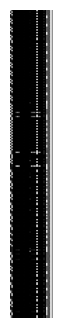

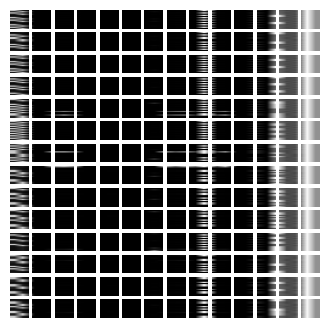

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = images_arr_train[np.random.choice(images_arr_train.shape[-1])]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [172]:
# Define the custom layer 'PatchEncoder'
class PatchEncoder(keras.layers.Layer):
    def __init__(self, num_patches, projection_dim, name='patch_encoder'):
        super(PatchEncoder, self).__init__(name=name)
        self.num_patches = num_patches
        self.projection = keras.layers.Dense(units=projection_dim)
        self.position_embedding = keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    @classmethod
    def from_config(cls, config):
        config.pop('trainable', None)
        return cls(
            num_patches=config['num_patches'],
            projection_dim=config['projection_dim'],
            name=config['name']
        )

In [28]:
# Define the custom layer 'PatchEncoder'
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, name='patch_encoder'):
        super(PatchEncoder, self).__init__(name=name)
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    @classmethod
    def from_config(cls, config):
        config.pop('trainable', None)
        return cls(
            num_patches=config['num_patches'],
            projection_dim=config['projection_dim'],
            name=config['name']
        )

In [26]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, name='patch_encoder'):
        super(PatchEncoder, self).__init__(name=name)
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    @classmethod
    def from_config(cls, config):
        config.pop('trainable', None)
        return cls(
            num_patches=config['num_patches'],
            projection_dim=config['projection_dim'],
            name=config['name']
        )


In [11]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [173]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
            keras.metrics.SparseCategoricalCrossentropy(name = "Crossentropy"),
        ],
    )

    checkpoint_filepath = "tmp/checkpoint/"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=images_arr_train,
        y=labels_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy, Crossentropy = model.evaluate(images_arr_train, labels_train)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    print(f"Test crossentropy: {round(Crossentropy)}%")

    model.save("model_cic_400k_31_col_2_.h5")
    return history, model
    

vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


3/3 [==============================] - 6s 1s/step
False positives: [0 0 0 0 0 0 0 0]
False negatives: [0 0 0 0 0 0 0 0]
True negatives: [77 77 77 77 77 77 77 77]
True positives: [11 11 11 11 11 11 11 11]


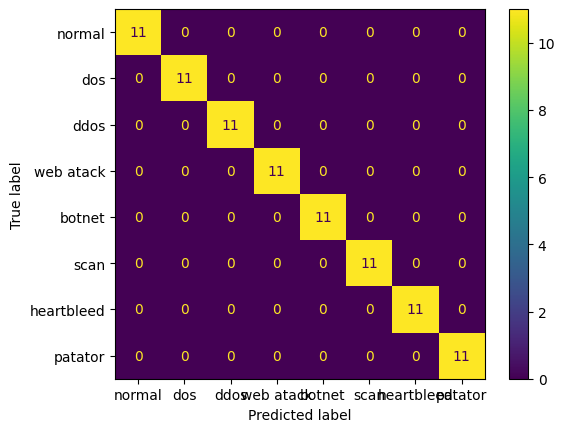

In [180]:
#hada
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def run_experiment(model_path, test_images, test_labels, batch_size):
    # Register the custom layers with the custom_objects parameter
    custom_objects = {'Patches': Patches, 'PatchEncoder': PatchEncoder}
    model = keras.models.load_model(model_path, custom_objects=custom_objects)  # Load the pre-trained model

    metrics = model.evaluate(
        x=test_images,
        y=test_labels,
        batch_size=batch_size
    )

    return model

vit_classifier_path = "model_cic_400k_31_col_2_99_94.h5"
batch_size = 32
test_metrics = run_experiment(vit_classifier_path, images_arr_train, labels_train, batch_size)

# Evaluate the model on the test dataset
y_pred = test_metrics.predict(images_arr_train)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_train, y_pred_classes)

# Compute the false positive rate
false_positives = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
false_negatives = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
true_negatives = conf_matrix.sum() - (false_positives + false_negatives + np.diag(conf_matrix))
true_positives = np.diag(conf_matrix)
false_positive_rate = false_positives / (false_positives + true_negatives)

print("False positives:", false_positives)
print("False negatives:", false_negatives)
print("True negatives:", true_negatives)
print("True positives:", true_positives)

conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["normal","dos","ddos","web atack","botnet","scan","heartbleed","patator"])
conf_mat_display.plot()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Evaluate the model on the test dataset
y_pred = vit_classifier.predict(images_arr_train)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_train, y_pred_classes)

# Compute the false positive rate
false_positives = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
false_negatives = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
true_negatives = conf_matrix.sum() - (false_positives + false_negatives + np.diag(conf_matrix))
true_positives = np.diag(conf_matrix)
false_positive_rate = false_positives / (false_positives + true_negatives)
  
print ("false positives : " + str (false_positives))
print ("false negatives : " + str (false_negatives))
print("true negatives : " + str (true_negatives))
print("true positive : " + str(true_positives))

conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["normal","dos","ddos","web atack","botnet","scan","heartbleed","patator"])
conf_mat_display.plot()
plt.show()